In [93]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
import pickle
import folium
import json
from sodapy import Socrata

%matplotlib inline

In [92]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [94]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [95]:
params = {'$limit':50000}

In [96]:
response = requests.get(endpoint,params=params )

In [97]:
response

<Response [200]>

In [98]:
res = response.json()

In [99]:
res

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [100]:
url = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
JSONContent = requests.get(url).json()
content = json.dumps(JSONContent, indent = 4, sort_keys=True)
print(content)

[
    {
        "month_name": "January",
        "query_count": "223",
        "query_text": "ebid",
        "year": "2014"
    },
    {
        "month_name": "January",
        "query_count": "112",
        "query_text": "property maps",
        "year": "2014"
    },
    {
        "month_name": "January",
        "query_count": "97",
        "query_text": "maps",
        "year": "2014"
    },
    {
        "month_name": "January",
        "query_count": "90",
        "query_text": "property tax",
        "year": "2014"
    },
    {
        "month_name": "January",
        "query_count": "76",
        "query_text": "jobs",
        "year": "2014"
    },
    {
        "month_name": "January",
        "query_count": "75",
        "query_text": "employment",
        "year": "2014"
    },
    {
        "month_name": "January",
        "query_count": "73",
        "query_text": "human resources",
        "year": "2014"
    },
    {
        "month_name": "January",
        "query_count": "62"

In [103]:
Top_500_Searches = pd.DataFrame(res)

In [104]:
Top_500_Searches

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN
...,...,...,...,...,...
41172,February,2021,8,sanitation,2
41173,February,2021,8,transportation,2
41174,February,2021,8,traffic accident report,2
41175,February,2021,8,tattoo license,2


In [125]:
Top_500_Searches.loc[Top_500_Searches['query_text'] == maps]

,month_name,year,query_count,query_text,month
2,January,2014,97,maps,NaN
503,February,2014,140,maps,NaN
1005,March,2014,144,maps,NaN
1503,April,2014,152,maps,NaN
2003,May,2014,119,maps,NaN
...,...,...,...,...,...
37030,June,2020,136,maps,6
38081,August,2020,125,maps,8
39011,October,2020,127,maps,10
39196,November,2020,86,maps,11


In [133]:
Top_500_Searches

,month_name,year,query_count,query_text,month
2,January,2014,97,maps,NaN
503,February,2014,140,maps,NaN
1005,March,2014,144,maps,NaN
1503,April,2014,152,maps,NaN
2003,May,2014,119,maps,NaN
...,...,...,...,...,...
37030,June,2020,136,maps,6
38081,August,2020,125,maps,8
39011,October,2020,127,maps,10
39196,November,2020,86,maps,11


In [129]:
joined_month = Top_500_Searches['month_name'] + str(' ') + Top_500_Searches['year']
joined_month

2         January 2014
503      February 2014
1005        March 2014
1503        April 2014
2003          May 2014
             ...      
37030        June 2020
38081      August 2020
39011     October 2020
39196    November 2020
39688    December 2020
Length: 79, dtype: object

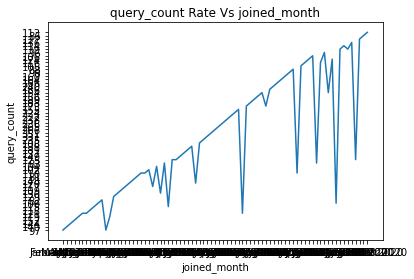

In [130]:
#df = pd.DataFrame(Top_500_Searches,columns=['year','query_count'])
 
plt.plot(joined_month, Top_500_Searches.query_count)
plt.title('query_count Rate Vs joined_month')
plt.xlabel('joined_month')
plt.ylabel('query_count')
plt.show()